In [ ]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import anthropic
from IPython.display import Markdown, display, update_display
import google.generativeai

In [ ]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set")

In [ ]:
openai = OpenAI()

In [ ]:
google.generativeai.configure()

In [ ]:
system_message = "You are an assistant that is great at telling jokes"
user_prompt = "Tell a light-hearted joke for an audience of Data Scientists"

In [ ]:
prompts = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

In [ ]:
completion = openai.chat.completions.create(
    model='gpt-4.1-mini',
    messages=prompts,
    temperature=0.7
)
print(completion.choices[0].message.content)

In [ ]:
completion = openai.chat.completions.create(
    model='gpt-4.1',
    messages=prompts,
    temperature=0.4
)
print(completion.choices[0].message.content)

In [ ]:
gemini = google.generativeai.GenerativeModel(
    model_name='gemini-2.0-flash',
    system_instruction=system_message
)
response = gemini.generate_content(user_prompt)
print(response.text)

In [ ]:
print(response)

In [ ]:
prompts = [
    {"role": "system", "content": "You are a helpful assistant that responds in Markdown"},
    {"role": "user", "content": "How do I decide if a business problem is suitable for an LLM solution? Please respond in Markdown."}
  ]

In [ ]:
stream = openai.chat.completions.create(
    model='gpt-4.1-mini',
    messages=prompts,
    temperature=0.7,
    stream=True
)

reply = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    reply += chunk.choices[0].delta.content or ''
    reply = reply.replace("```","").replace("markdown","")
    update_display(Markdown(reply), display_id=display_handle.display_id)

In [1]:
# imports

import os
import requests
from bs4 import BeautifulSoup
from typing import List
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai
import anthropic
import gradio as gr # oh yeah!
from datetime import timedelta

In [ ]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set")

In [ ]:
openai = OpenAI()


google.generativeai.configure()

In [ ]:
system_message = "You are a helpful assistant"

In [ ]:
def message_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    completion = openai.chat.completions.create(
        model='gpt-4o-mini',
        messages=messages,
    )
    return completion.choices[0].message.content

In [ ]:
message_gpt("What is today's date?")

In [ ]:
def shout(text):
    print(f"Shout has been called with input {text}")
    return text.upper()

In [ ]:
shout("hello")

In [ ]:
gr.Interface(fn=shout, inputs="textbox", outputs="textbox").launch()


In [ ]:
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch(share=True)

In [ ]:
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch(inbrowser=True)

In [ ]:
force_dark_mode = """
function refresh() {
    const url = new URL(window.location);
    if (url.searchParams.get('__theme') !== 'dark') {
        url.searchParams.set('__theme', 'dark');
        window.location.href = url.href;
    }
}
"""
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never", js=force_dark_mode).launch()

In [ ]:
view = gr.Interface(
    fn=shout,
    inputs=[gr.Textbox(label="Your message:", lines=6)],
    outputs=[gr.Textbox(label="Response:", lines=8)],
    flagging_mode="never"
)
view.launch()

In [ ]:
view = gr.Interface(
    fn=message_gpt,
    inputs=[gr.Textbox(label="Your message:", lines=6)],
    outputs=[gr.Textbox(label="Response:", lines=8)],
    flagging_mode="never"
)
view.launch()

In [ ]:
def stream_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    stream = openai.chat.completions.create(
        model='gpt-4o-mini',
        messages=messages,
        stream=True
    )
    result = ""
    for chunk in stream:
        result += chunk.choices[0].delta.content or ""
        yield result

In [ ]:
def stream_gemini(user_prompt):
    messages = [
        {"role": "system", "content": system_message },  # Adjust 'system_message' as necessary
        {"role": "user", "content": user_prompt}
    ]
    
    gemini = google.generativeai.GenerativeModel(
        model_name='gemini-2.0-flash',
        system_instruction=system_message
    )
    response = gemini.generate_content(user_prompt)
    print(response.text)

In [ ]:
view = gr.Interface(
    fn=stream_gemini,
    inputs=[gr.Textbox(label="Your message:")],
    outputs=[gr.Markdown(label="Response:")],
    flagging_mode="never"
)
view.launch()

In [ ]:
class Website:
    url: str
    title: str
    text: str

    def __init__(self, url):
        self.url = url
        response = requests.get(url)
        self.body = response.content
        soup = BeautifulSoup(self.body, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

    def get_contents(self):
        return f"Webpage Title:\n{self.title}\nWebpage Contents:\n{self.text}\n\n"

In [ ]:
system_message = "You are an assistant that analyzes the contents of a company website landing page \
and creates a short brochure about the company for prospective customers, investors and recruits. Respond in markdown."

In [ ]:
def stream_brochure(company_name, url, model):
    yield ""
    prompt = f"Please generate a company brochure for {company_name}. Here is their landing page:\n"
    prompt += Website(url).get_contents()
    if model=="GPT":
        result = stream_gpt(prompt)
    elif model=="Gemini":
        result = stream_gemini(prompt)
    else:
        raise ValueError("Unknown model")
    yield from result

In [ ]:
view = gr.Interface(
    fn=stream_brochure,
    inputs=[
        gr.Textbox(label="Company name:"),
        gr.Textbox(label="Landing page URL including http:// or https://"),
        gr.Dropdown(["GPT","Gemini"], label="Select model")],
    outputs=[gr.Markdown(label="Brochure:")],
    flagging_mode="never"
)
view.launch()

In [ ]:

import os
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [ ]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set")

In [ ]:
openai = OpenAI()
MODEL = 'gpt-4o-mini'

In [ ]:
system_message = "You are a helpful assistant"

In [ ]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]

    print("History is:")
    print(history)
    print("And messages is:")
    print(messages)

    stream = openai.chat.completions.create(model=MODEL, messages=messages, stream=True)

    response = ""
    for chunk in stream:
        response += chunk.choices[0].delta.content or ''
        yield response

In [ ]:
gr.ChatInterface(fn=chat, type="messages").launch()

In [1]:

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [2]:
load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "gpt-4o-mini"
openai = OpenAI()


OpenAI API Key exists and begins sk-proj-


In [3]:
system_message = "You are a helpful assistant for an Airline called FlightAI. "
system_message += "Give short, courteous answers, no more than 1 sentence. "
system_message += "Always be accurate. If you don't know the answer, say so."

In [4]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages)
    return response.choices[0].message.content

gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [4]:

ticket_prices = {"london": "$799", "paris": "$899", "tokyo": "$1400", "berlin": "$499"}

def get_ticket_price(destination_city):
    print(f"Tool get_ticket_price called for {destination_city}")
    city = destination_city.lower()
    return ticket_prices.get(city, "Unknown")

In [5]:
price_function = {
    "name": "get_ticket_price",
    "description": "Get the price of a return ticket to the destination city. Call this whenever you need to know the ticket price, for example when a customer asks 'How much is a ticket to this city'",
    "parameters": {
        "type": "object",
        "properties": {
            "destination_city": {
                "type": "string",
                "description": "The city that the customer wants to travel to",
            },
        },
        "required": ["destination_city"],
        "additionalProperties": False
    }
}

In [6]:
# And this is included in a list of tools:

tools = [{"type": "function", "function": price_function}]

In [7]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)

    if response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response, city = handle_tool_call(message)
        messages.append(message)
        messages.append(response)
        response = openai.chat.completions.create(model=MODEL, messages=messages)
    
    return response.choices[0].message.content

In [8]:
def handle_tool_call(message):
    tool_call = message.tool_calls[0]
    arguments = json.loads(tool_call.function.arguments)
    city = arguments.get('destination_city')
    price = get_ticket_price(city)
    response = {
        "role": "tool",
        "content": json.dumps({"destination_city": city,"price": price}),
        "tool_call_id": tool_call.id
    }
    return response, city

In [9]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [10]:
import base64
from io import BytesIO
from PIL import Image

In [11]:
def artist(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

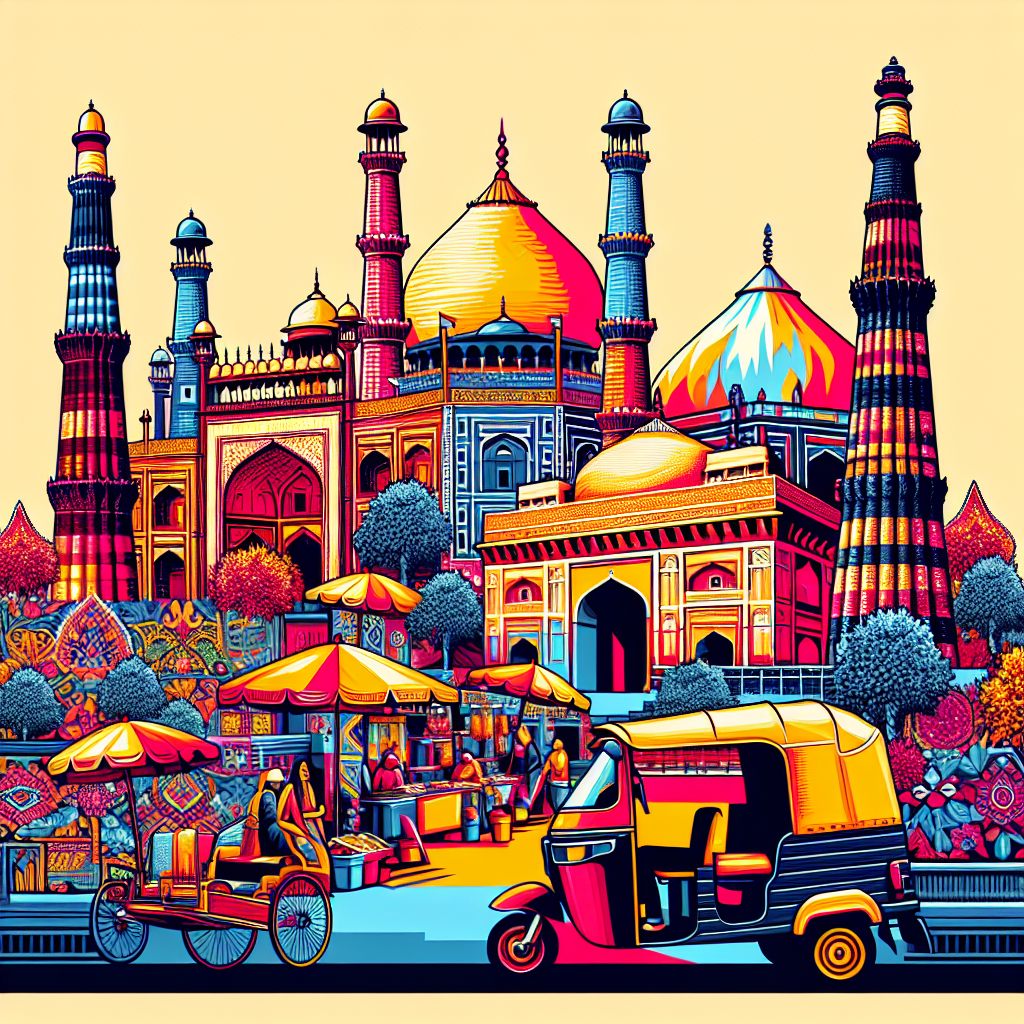

In [14]:
image = artist("New Delhi")
display(image)

In [15]:
!ffmpeg -version
!ffprobe -version
!ffplay -version

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.
'ffprobe' is not recognized as an internal or external command,
operable program or batch file.
'ffplay' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
def chat(history):
    messages = [{"role": "system", "content": system_message}] + history
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)
    image = None
    
    if response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response, city = handle_tool_call(message)
        messages.append(message)
        messages.append(response)
        image = artist(city)
        response = openai.chat.completions.create(model=MODEL, messages=messages)
        
    reply = response.choices[0].message.content
    history += [{"role":"assistant", "content":reply}]

    # Comment out or delete the next line if you'd rather skip Audio for now..
    #talker(reply)
    
    return history, image

In [17]:
# More involved Gradio code as we're not using the preset Chat interface!
# Passing in inbrowser=True in the last line will cause a Gradio window to pop up immediately.

with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(height=500)
    with gr.Row():
        entry = gr.Textbox(label="Chat with our AI Assistant:")
    with gr.Row():
        clear = gr.Button("Clear")

    def do_entry(message, history):
        history += [{"role":"user", "content":message}]
        return "", history

    entry.submit(do_entry, inputs=[entry, chatbot], outputs=[entry, chatbot]).then(
        chat, inputs=chatbot, outputs=[chatbot, image_output]
    )
    clear.click(lambda: None, inputs=None, outputs=chatbot, queue=False)

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Tool get_ticket_price called for London
